In [748]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [749]:
df = pd.read_csv('Housing.csv', encoding='latin-1')
df = pd.get_dummies(df, columns=['mainroad', 'basement', 'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus'], drop_first=True)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df = df.drop(['bedrooms', 'bathrooms'], axis=1)
# df.head()

In [750]:
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

price                              1.000000
area                               0.535997
total_rooms                        0.511809
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


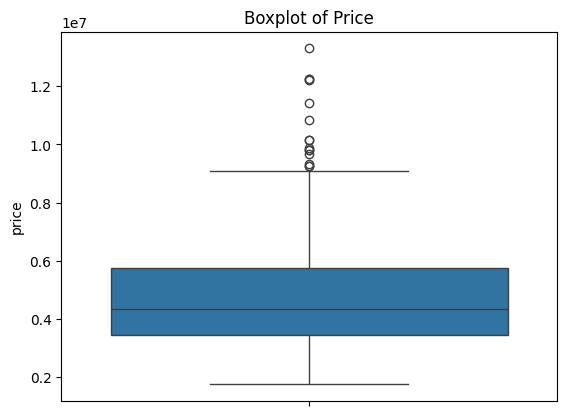

In [751]:
sns.boxplot(df['price'])
plt.title("Boxplot of Price")
plt.show()

In [752]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter for outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Display the outliers
# print(outliers)

In [753]:
df = df[df['price'] <= upper_bound]

In [754]:
X = df.drop(['price', 'hotwaterheating_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['price']

In [755]:
# X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)
# print(df.isnull().sum())

In [756]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [757]:
y_pred = model.predict(X_test)

In [758]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 699974.9685534592
R-squared Score: 0.6021241601472995
